In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np

In [2]:
start_im = 0.68
end_im = 1.25
start_mz = 387.5
end_mz = 1008.5
width = 12.5
overlap = 1
window_stacks = 3
palette = 'rocket'

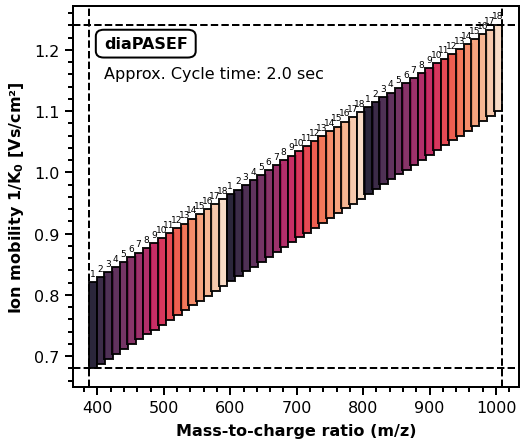

In [3]:
ms1 = ['MS1', 0, '-', '-', '-', '-', '-']
columns = ['#MS Type', 'Cycle Id', 'Start IM [1/K0]', 'End IM [1/K0]', 'Start Mass [m/z]', 'End Mass [m/z]', 'CE [eV]']

method = pd.DataFrame(columns=columns)

window_width = width - overlap
window_nr = int((end_mz - start_mz) / window_width)
cycle_nr = int(np.ceil(window_nr / window_stacks))

window_height = (end_im - start_im) / (window_stacks + 1)

for i in range(window_nr):
    
    mz = start_mz + i*window_width
    im = start_im + i*(window_height / cycle_nr)
    
    row_entry = ['PASEF', i+1, im, im + window_height - 0.001, mz, mz + width, '-']
    
    method.loc[i] = row_entry
    
cycle = list(range(1, cycle_nr + 1))
cycles = cycle * window_stacks 
overhang = len(method) - len(cycles)

if overhang < 0:
    method['Cycle Id'] = cycles[:overhang]
if overhang == 0:
    method['Cycle Id'] = cycles
    
method = method.reset_index(drop=True)

fig, ax = plt.subplots(1,1, figsize=(8,7))
ax.spines[['top', 'bottom', 'left', 'right']].set_linewidth(2)

colors = sns.color_palette(palette, method['Cycle Id'].max())

for i in range(len(method)):
    
    xy = (method['Start Mass [m/z]'][i], method['Start IM [1/K0]'][i])
    width = method['End Mass [m/z]'][i] - method['Start Mass [m/z]'][i]
    height = method['End IM [1/K0]'][i] - method['Start IM [1/K0]'][i]
    cycle_id = method['Cycle Id'][i]
    
    rect = patches.Rectangle(xy, width, height, linewidth=2, edgecolor='k', facecolor=colors[cycle_id-1], alpha=0.9)
    ax.add_patch(rect)
    
#     cycle numbering:
    ax.text(x=xy[0]+width/2-1, y=xy[1]+height+0.01, s=str(cycle_id), fontsize=36-len(method)/2, ha='center')
    
xmin = method['Start Mass [m/z]'].min() - 25
xmax = method['End Mass [m/z]'].max() + 25
ymin = method['Start IM [1/K0]'].min() - 0.03
ymax = method['End IM [1/K0]'].max() + 0.03

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

ax.minorticks_on()
ax.tick_params(axis='both', which='major', pad=5, length=8, width=2, labelsize=16)
ax.tick_params(axis='both', which='minor', pad=5, length=5, width=2)

props = dict(boxstyle='round, pad=0.5', facecolor='white', edgecolor='k', 
             linewidth=2, mutation_aspect=0.8, pad=0.3)

ax.text(xmin + 0.07*(xmax-xmin), ymin + 0.89*(ymax-ymin), 'diaPASEF', fontsize=16, fontweight='bold', bbox=props)
c_time = 0.10501 * (cycle_nr + 1)
ax.text(xmin + 0.07*(xmax-xmin), ymin + 0.81*(ymax-ymin), 
        'Approx. Cycle time: ' + str(round(c_time, 2)) + ' sec', fontsize=16)

ax.set_xlabel('Mass-to-charge ratio (m/z)', fontsize=16, fontweight='bold', labelpad=8)
ax.set_ylabel('Ion mobility 1/K'+r'$\bf{_{0}}$'+' [Vs/cm²]', fontsize=16, fontweight='bold', labelpad=8)

ax.axhline(y=method['End IM [1/K0]'].max(), linestyle='dashed', lw=2, color='k')
ax.axhline(y=method['Start IM [1/K0]'].min(), linestyle='dashed', lw=2, color='k')
ax.axvline(x=method['End Mass [m/z]'].max(), linestyle='dashed', lw=2, color='k')
ax.axvline(x=method['Start Mass [m/z]'].min(), linestyle='dashed', lw=2, color='k')


In [4]:
output_path = 'Data/'

method.loc[len(method)] = ms1
method = method.sort_values(by='Cycle Id').reset_index(drop=True)

# method.to_csv(output_path + 'diaParameters.txt', index=False)